In [91]:
import numpy as np
import pandas as pandas
import ast
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('Datasets/part_train.csv', converters={'genre': ast.literal_eval})

In [49]:
df.shape

(1999, 5008)

In [50]:
vocab = df.columns[8:]
vocab

Index([&#39;i&#39;, &#39;the&#39;, &#39;you&#39;, &#39;to&#39;, &#39;and&#39;, &#39;a&#39;, &#39;me&#39;, &#39;it&#39;, &#39;don&#39;t&#39;, &#39;in&#39;,
       ...
       &#39;writer&#39;, &#39;motivo&#39;, &#39;bake&#39;, &#39;insist&#39;, &#39;wel&#39;, &#39;santo&#39;, &#39;pe&#39;, &#39;gee&#39;,
       &#39;college&#39;, &#39;kad&#39;],
      dtype=&#39;object&#39;, length=5000)

In [ ]:
# Remove stopwords

from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords

for i in range(len(vocab)):
    if vocab[i] in stop_words.ENGLISH_STOP_WORDS or vocab[i] in stopwords.words('english'):
        df.drop(vocab[i], axis=1, inplace=True)

In [66]:
df.shape

(1999, 4739)

In [76]:
from collections import Counter

genres = {} # {genre: count}

def count_genres(genreList):
    for genre in genreList:
        name = genre['genre_name']
        if name not in genres.keys():
            genres[name] = 1
        else:
            genres[name] += 1

df['genre'].apply(count_genres)

genres_rank = Counter(genres).most_common()


In [245]:
columns = [t[0].upper() for t in genres_rank]
bi_df = pd.DataFrame(columns=columns, index=np.arange(len(df)))

i = 0
def make_binary_genres(genreList):
    global i
    for genre in genreList:
        g = genre['genre_name'].upper()
        bi_df.at[i, g] = 1

    i += 1

df['genre'].apply(make_binary_genres)
bi_df.fillna(0, inplace=True)


In [246]:
bi_df.head()

,ROCK,POP,ALTERNATIVE,HEAVY METAL,COUNTRY,LATIN,SINGER/SONGWRITER,HIP HOP/RAP,R&B/SOUL,CHRISTIAN & GOSPEL,...,ARABIC,FUSION,ROCK & ROLL,CONTEMPORARY COUNTRY,SOFT ROCK,HONKY TONK,DANCEHALL,SOCA,WEST COAST RAP,NEW ACOUSTIC
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Wordcloud

In [160]:
# Drop words with fewer frequency
word_counts = df.iloc[:, 8:].sum(axis=0)
sorted_words = word_counts.sort_values(ascending=False)

for word in sorted_words.index[500:]:
    df.drop(word, axis=1, inplace=True)
    

In [263]:
# Merge words_df and genre_df
df_genre = pd.concat([df, bi_df], axis=1)
df_genre.head()

,mxm_track_id,track_id,track_name,artist_id,artist_name,genre,rating,num_favourite,love,know,...,ARABIC,FUSION,ROCK & ROLL,CONTEMPORARY COUNTRY,SOFT ROCK,HONKY TONK,DANCEHALL,SOCA,WEST COAST RAP,NEW ACOUSTIC
0,4623710,TRAAAAV128F421A322,A Poor Recipe for Civic Cohesion,140677,Western Addiction,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6477168,TRAAABD128F429CF47,Soul Deep,15105,The Box Tops,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,2516445,TRAAAED128E0783FAB,It's About Time,53213,Jamie Cullum,"[{'genre_id': 11, 'genre_name': 'Jazz'}]",19,0,11,0,...,0,0,0,0,0,0,0,0,0,0
3,3759847,TRAAAEF128F4273421,Something Girls,14136,Adam Ant,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3783760,TRAAAEW128F42930C0,Burn My Body,68409,Broken Spindles,"[{'genre_id': 20, 'genre_name': 'Alternative'}...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
from wordcloud import WordCloud, ImageColorGenerator

def draw_wordcloud(genre=None):
    if genre:
        songs = df_genre[df_genre[genre.upper()]==1]
    else:
        songs = df_genre

    word_counts = songs.iloc[:, 8:508].sum(axis=0)

    freq = {word: word_counts[i] for i, word in enumerate(word_counts.index)}
    wordcloud = WordCloud(width=1600, height=1000)

    wordcloud.generate_from_frequencies(freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Wordcloud of genre {genre}')
    plt.axis('off')
    plt.show()


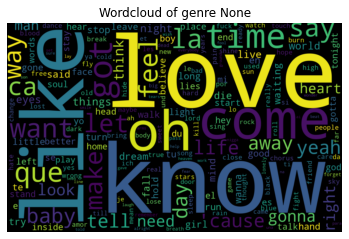

In [271]:
draw_wordcloud()

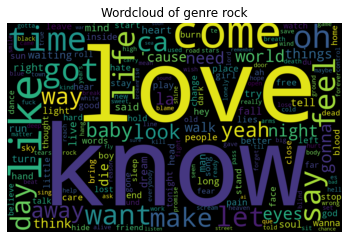

In [272]:
draw_wordcloud('rock')

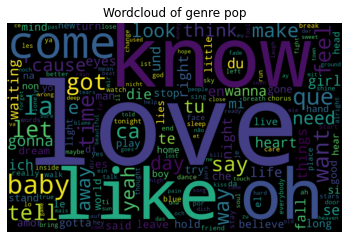

In [273]:
draw_wordcloud('pop')

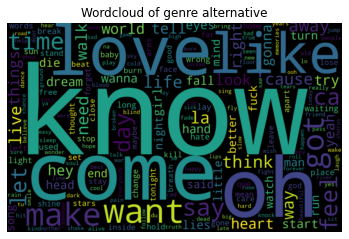

In [274]:
draw_wordcloud('alternative')

### Linear regression based on genre

In [ ]:
from sklearn.linear_model import LinearRegression

def train_model_predict(genre, test_data):
    data = df_genre[df_genre[genre.upper()] == 1]
    train_data = df_genre.iloc[:, 8:df.shape[1]]
    train_label = df_genre['rating']

    model = LinearRegression(solver='liblinear')
    model.fit(train_data, train_label)

    predictions = model.predict(test_data)
    return predictions


In [277]:
df.head()

,mxm_track_id,track_id,track_name,artist_id,artist_name,genre,rating,num_favourite,love,know,...,key,climb,okay,og,single,tryin',y'all,temps,grey,jeg
0,4623710,TRAAAAV128F421A322,A Poor Recipe for Civic Cohesion,140677,Western Addiction,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6477168,TRAAABD128F429CF47,Soul Deep,15105,The Box Tops,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,2516445,TRAAAED128E0783FAB,It's About Time,53213,Jamie Cullum,"[{'genre_id': 11, 'genre_name': 'Jazz'}]",19,0,11,0,...,0,0,0,0,0,0,0,0,0,0
3,3759847,TRAAAEF128F4273421,Something Girls,14136,Adam Ant,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3783760,TRAAAEW128F42930C0,Burn My Body,68409,Broken Spindles,"[{'genre_id': 20, 'genre_name': 'Alternative'}...",1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(solver='liblinear')
prediction = train_model_predict(log_model, train_data, train_label, test_data)